In [155]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


data1 = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Monitor vs Set value\scope_log_20240930_RF_200mVDiv_.txt',skiprows = 1,delimiter=',')
data2 = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Monitor vs Set value\scope_log_20240930_RF_500mVDiv_.txt',skiprows = 1,delimiter=',')
data3 = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Monitor vs Set value\scope_log_20240930_RF_1VDiv_.txt',skiprows = 1,delimiter=',')
data4 = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Monitor vs Set value\scope_log_20240930_RF_2VDiv_.txt',skiprows = 1,delimiter=',')
data5 = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Monitor vs Set value\scope_log_20240930_RF_5VDiv_.txt',skiprows = 1,delimiter = ',')
dataSets = [data1,data2,data3,data4,data5]
labels = ['200mV / div', '500mv / div', '1V / div', '2V / div', '5V / div']

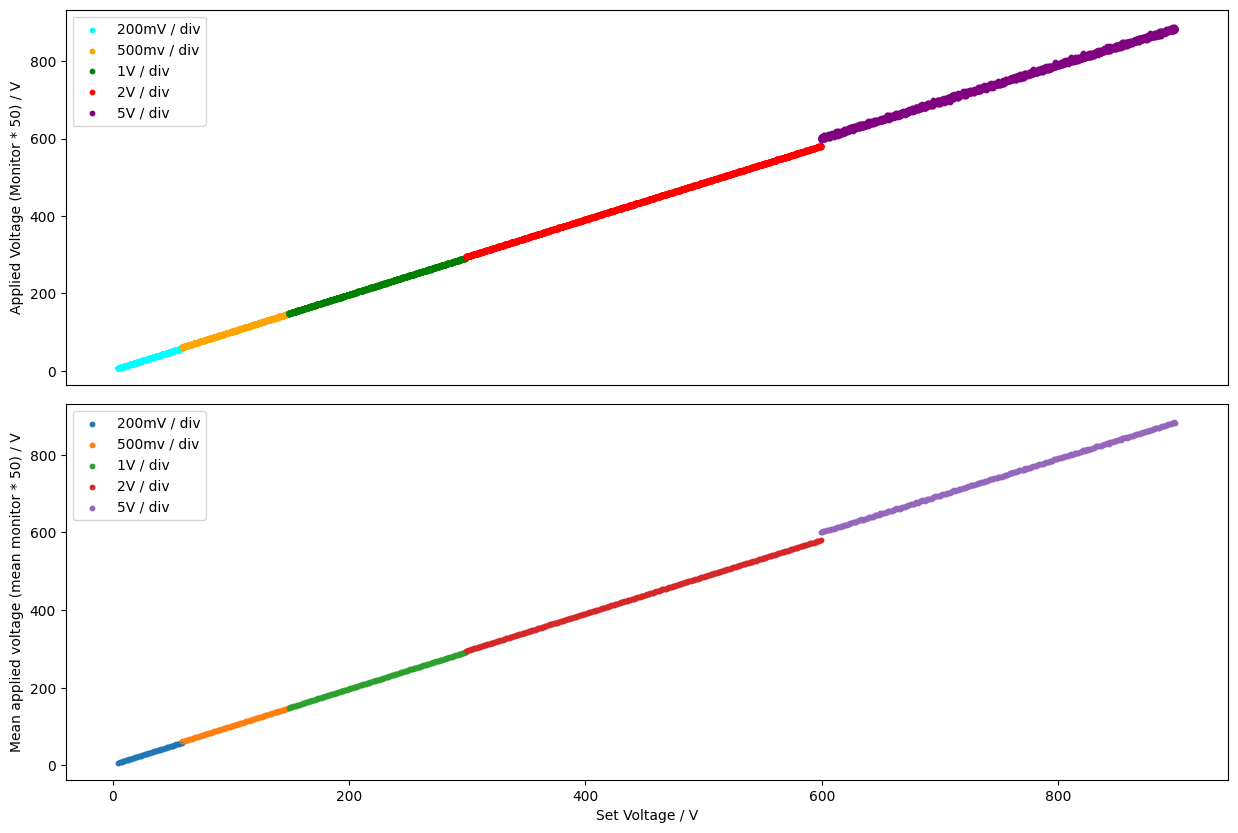

In [156]:
fig, ax = plt.subplots(2,1,figsize = (15,10))
ax[0].xaxis.set_visible(False)
ax[1].set_xlabel('Set Voltage / V')
ax[0].set_ylabel('Applied Voltage (Monitor * 50) / V')
ax[1].set_ylabel('Mean applied voltage (mean monitor * 50) / V')
plt.subplots_adjust(hspace=0.05)
colors = ['cyan','orange','g','r','purple']
for data,divSize,color in zip(dataSets,labels,colors):
    #Define data
    ts = data[:,0]
    vMonitor = data[:,1]
    vSet = data[:,2]
    
    #Plot basic the various datapoints at each value of vSet
    ax[0].scatter(vSet,vMonitor*50, s = 10,label = divSize,color = color)

    #Create list of unique set voltages
    uniqueSetVals = list({val for val in vSet})
    meanMonitor = []
    vSTD = []

    #Loop over unique voltages and determine the mean monitor voltage as well as its STD for each set voltage
    for val in uniqueSetVals:
        mask = np.where(vSet == val)
        meanMonitor.append(np.mean(vMonitor[mask]))
        vSTD.append(np.std(vMonitor[mask]))
    meanMonitor = np.array(meanMonitor)
    vSTD = np.array(vSTD)

    #Plot mean monitor voltage vs set voltage and include errorbars calculated from STD.
    ax[1].scatter([val for val in uniqueSetVals],meanMonitor*50, s =10,label = divSize,color = color)
    ax[1].errorbar([val for val in uniqueSetVals],meanMonitor*50,vSTD*50, ls ='',color = color)

#Add legend to plot.
ax[0].legend()
ax[1].legend()

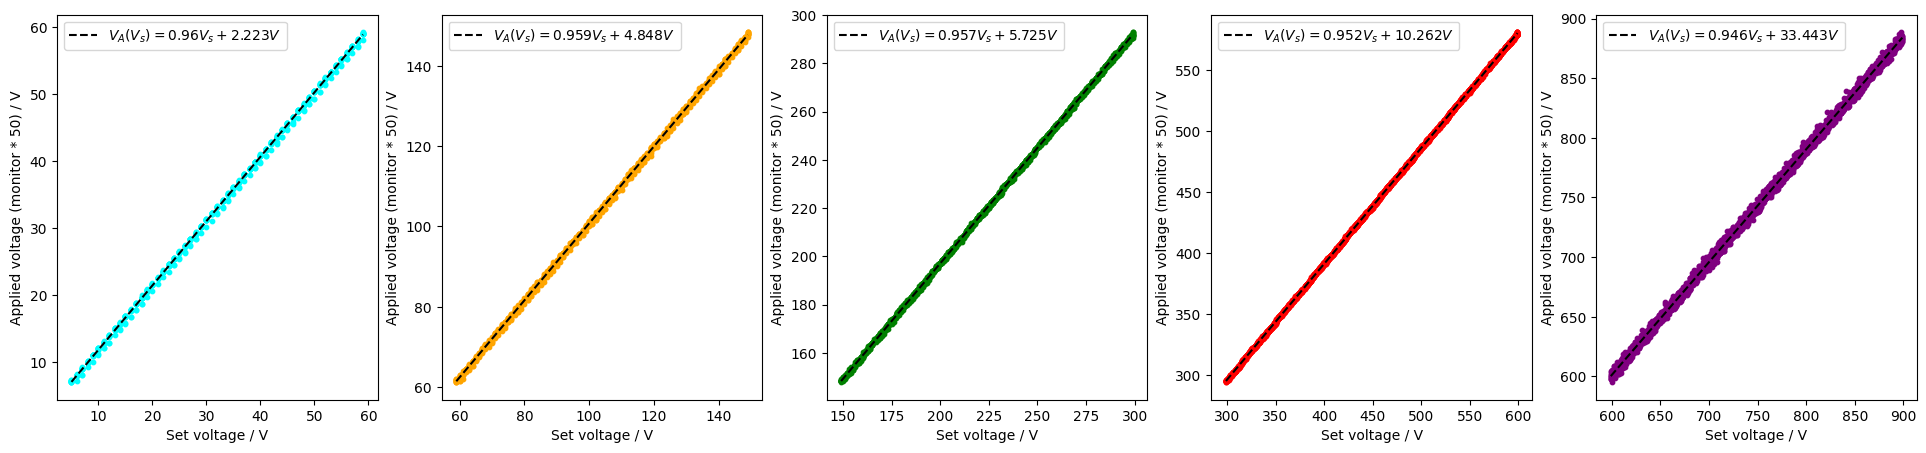

In [157]:
def testFunc(x,a,b):
    return a*x+b
popts = []
pcovs = []
fig2,ax2 = plt.subplots(1,len(dataSets),figsize  =(24,5))
for j,data in enumerate(dataSets):
    ax2[j].scatter(data[:,2],data[:,1]*50, s  = 10,color = colors[j])
    popt,pcov = curve_fit(testFunc,data[:,2],data[:,1]*50)
    xLSpace = np.linspace(np.min(data[:,2]),np.max(data[:,2]),1000)
    ax2[j].plot(xLSpace,testFunc(xLSpace,*popt),color = 'k', ls = '--',label = r'$V_A(V_s) = {0}V_s + {1}V$'.format(np.round(popt[0],3),np.round(popt[1],3)))
    ax2[j].legend()
    ax2[j].set_xlabel('Set voltage / V')
    ax2[j].set_ylabel('Applied voltage (monitor * 50) / V')
